<a href="https://colab.research.google.com/github/Lekhapriya88/Churn-Analysis/blob/master/Copy_of_JanataHack_Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT

Company of Electrolysia supplies electricity to the city. It is looking to optimise its electricity production based on the historical electricity consumption of the people of Electrovania. 
 
The company has hired you as a Data Scientist to investigate the past consumption and the weather information to come up with a model that catches the trend as accurately as possible. You have to bear in mind that there are many factors that affect electricity consumption and not all can be measured. Electrolysia has provided you this data on hourly data spanning five years. 
 
For this competition, the training set is comprised of the first 23 days of each month and the test set is the 24th to the end of the month, where the public leaderboard is based on the first two days of test, whereas the private leaderboard considers the rest of the days. Your task is to predict the electricity consumption on hourly basis.

Note that you cannot use future information to model past consumption. For example, you cannot use February 2017 data to predict last week of January 2017 information.



**DATA DICTIONARY**<br>

|ColumnName |	Description|
|-----------|-------------|
|ID	|Unique ID|
|datetime	|Datetime of record|
|temperature |	Temperature at that hour|
|var1	| Anonymized feature var1|
|pressure |	Pressure at that hour|
|windspeed	| Wind Speed at that hour|
|var2	| Anonymized feature var2|
|electricity_consumption	(target)| Electrical consumption (in MWh)|


sample_submission.csv

|Column Name|	Description|
|-----------|-------------|
|ID	|Unique ID|
|electricity_consumption	(target)| Electrical consumption (in MWh)|

**Evaluation metric**<br>
Submissions are evaluated on Root Mean Squared Error (RMSE) between the predicted and observed consumption for hours in the test dataset

In [0]:
!pip install pyforest

In [0]:
import pyforest
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score


In [0]:
PATH = '/content/drive/My Drive/JanataHack Timeseries/'

In [0]:
train = pd.read_csv('train_6BJx641.csv')
test = pd.read_csv('test_pavJagI.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [0]:
print(train.isna().sum())
print('*************************')
print(test.isna().sum())

ID                         0
datetime                   0
temperature                0
var1                       0
pressure                   0
windspeed                  0
var2                       0
electricity_consumption    0
dtype: int64
*************************
ID             0
datetime       0
temperature    0
var1           0
pressure       0
windspeed      0
var2           0
dtype: int64


In [0]:

print('Number of records in train:',train.shape)
print('Number of records in test:',test.shape)

Number of records in train: (26496, 8)
Number of records in test: (8568, 7)


In [0]:
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')
test['datetime'] = pd.to_datetime(test['datetime'], format='%Y-%m-%d %H:%M:%S')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [0]:
def combine_data():
  train['is_train'] = 1
  test['is_train'] = 0
  print('Number of records in train:',train.shape)
  print('Number of records in test:',test.shape)
  df = pd.concat([train,test])
  df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
  print('Number of records in total:',df.shape)
  return df

# converting the hourly basis data in to 1 record for each day
def resample_data(df):
  df = df.set_index('datetime')
  print('Number of records before resampling:',df.shape)
  df =df.resample('D').sum()
  print('Number of records after resampling:',df.shape)
  return df

In [0]:
df = combine_data()

Number of records in train: (26496, 9)
Number of records in test: (8568, 8)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Number of records in total: (35064, 9)


In [0]:
df

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,is_train
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,1
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,1
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,1
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,1
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,1
...,...,...,...,...,...,...,...,...,...
8563,35059,2017-06-30 19:00:00,-5.7,-18.6,998.0,233.595,A,NaN,0
8564,35060,2017-06-30 20:00:00,-5.7,-17.1,995.0,238.780,A,NaN,0
8565,35061,2017-06-30 21:00:00,-7.1,-19.3,1004.0,244.325,A,NaN,0
8566,35062,2017-06-30 22:00:00,-6.4,-19.3,1008.0,247.470,A,NaN,0


In [0]:
train.describe()

,ID,temperature,var1,pressure,windspeed,electricity_consumption,is_train
count,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.0
mean,17455.500000,5.098989,-1.916233,986.450615,23.959956,298.359601,1.0
std,10122.873673,8.682860,10.424860,12.002647,48.280321,108.020555,0.0
min,0.000000,-17.100000,-32.900000,953.000000,1.075000,174.000000,1.0
25%,8717.750000,-2.900000,-10.700000,978.000000,3.155000,219.000000,1.0
50%,17435.500000,6.400000,-1.400000,986.000000,6.545000,267.000000,1.0
75%,26177.250000,12.100000,7.900000,995.000000,22.260000,342.000000,1.0
max,34895.000000,23.600000,18.600000,1024.000000,586.600000,1386.000000,1.0


## Visualizing data

In [0]:
df = df.set_index('datetime')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

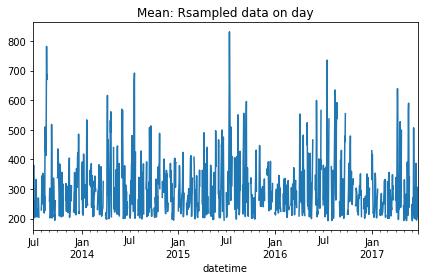

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

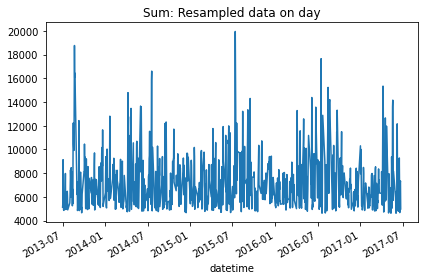

In [0]:
temp = df[df['is_train']!=0].resample('D').mean()
temp[temp['is_train']!=0]['electricity_consumption'].plot(title='Mean: Rsampled data on day')
plt.tight_layout()
plt.show()   

temp = df[df['is_train']!=0].resample('D').sum()
temp[temp['is_train']!=0]['electricity_consumption'].plot(title='Sum: Resampled data on day')
plt.tight_layout()
plt.show()   


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

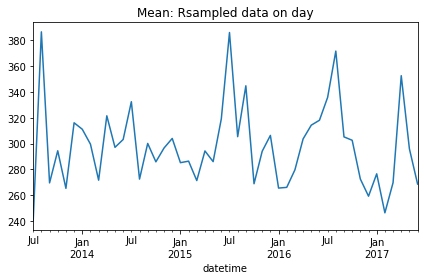

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

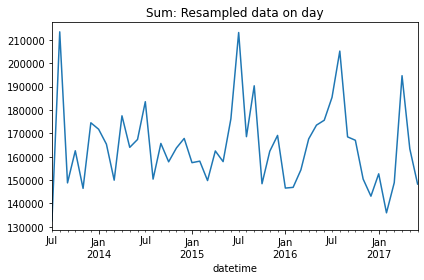

In [0]:
temp = df[df['is_train']!=0].resample('M').mean()
temp[temp['is_train']!=0]['electricity_consumption'].plot(title='Mean: Rsampled data on day')
plt.tight_layout()
plt.show()   

temp = df[df['is_train']!=0].resample('M').sum()
temp[temp['is_train']!=0]['electricity_consumption'].plot(title='Sum: Resampled data on day')
plt.tight_layout()
plt.show()   


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

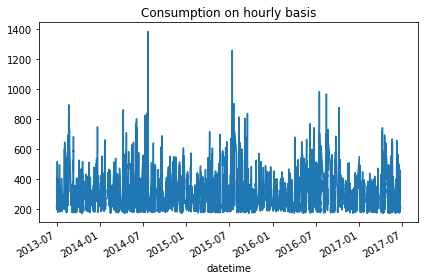

In [0]:
df[df['is_train']!=0]['electricity_consumption'].plot(title='Consumption on hourly basis')
plt.tight_layout()
plt.show()  

In [0]:
df.columns

Index(['ID', 'temperature', 'var1', 'pressure', 'windspeed', 'var2',
       'electricity_consumption', 'is_train'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

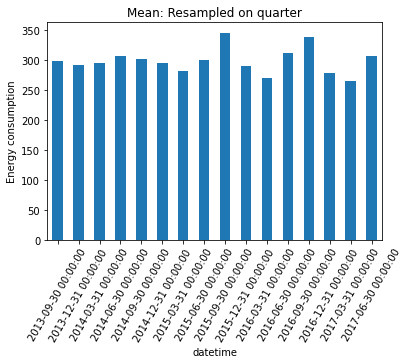

In [0]:
df['electricity_consumption'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Energy consumption')
plt.title('Mean: Resampled on quarter')
plt.show()

Upon visualising data on monthly basis, we can see that consumption of power is maximum in the month of July and consistently before the month of JAN power consumption is increasing comparatively to the preceding months

<IPython.core.display.Javascript object>

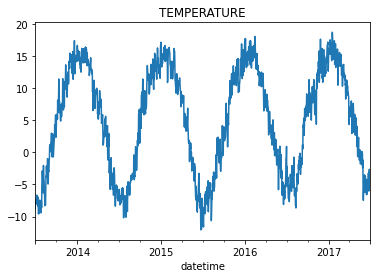

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

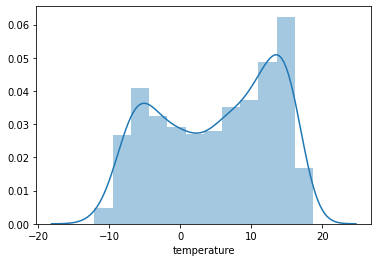

In [0]:
df['temperature'].resample('D').mean().plot(title='TEMPERATURE')
plt.show()

sns.distplot(df['temperature'].resample('D').mean())
plt.show()

<IPython.core.display.Javascript object>

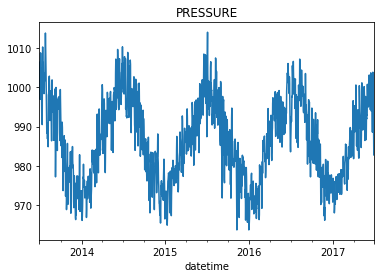

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

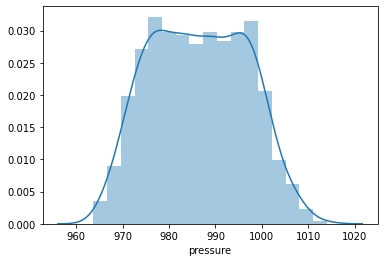

In [0]:
df['pressure'].resample('D').mean().plot(title='PRESSURE')
plt.show()

sns.distplot(df['pressure'].resample('D').mean())
plt.show()

<IPython.core.display.Javascript object>

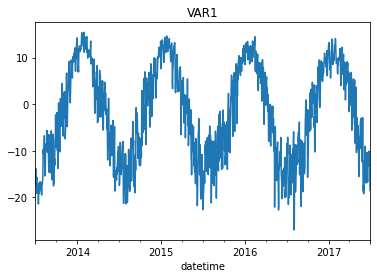

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show>

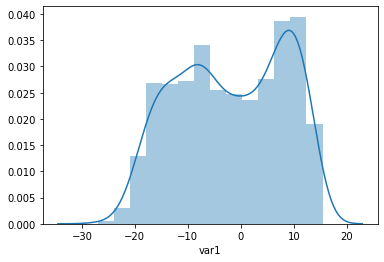

In [0]:
df['var1'].resample('D').mean().plot(title='VAR1')
plt.show()

sns.distplot(df['var1'].resample('D').mean())
plt.show

<IPython.core.display.Javascript object>

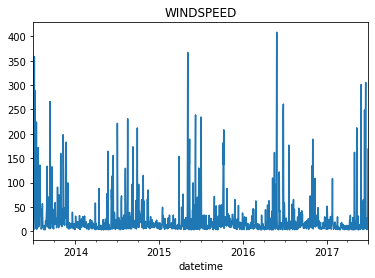

In [0]:
df['windspeed'].resample('D').mean().plot(title='WINDSPEED')
plt.show()

checking the correlation before resampling the data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

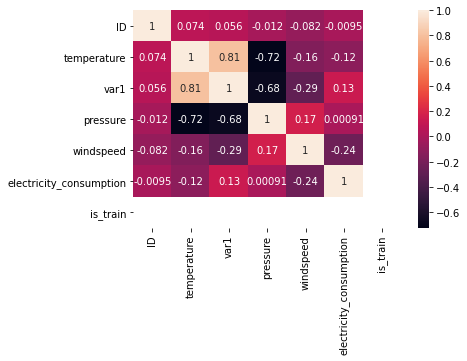

In [0]:
sns.heatmap(train.corr(), annot=True)
plt.show()

Temperature has good correlation with var1

Correlation after resamapling data on daily basis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

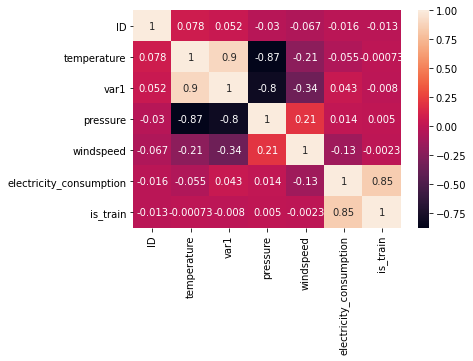

In [0]:
sns.heatmap(df.resample('D').sum().corr(), annot=True)
plt.show()

In [0]:
df

,ID,temperature,var1,pressure,windspeed,var2,electricity_consumption,is_train
datetime,,,,,,,,
2013-07-01 00:00:00,0,-11.4,-17.1,1003.0,571.910,A,216.0,1
2013-07-01 01:00:00,1,-12.1,-19.3,996.0,575.040,A,210.0,1
2013-07-01 02:00:00,2,-12.9,-20.0,1000.0,578.435,A,225.0,1
2013-07-01 03:00:00,3,-11.4,-17.1,995.0,582.580,A,216.0,1
2013-07-01 04:00:00,4,-11.4,-19.3,1005.0,586.600,A,222.0,1
...,...,...,...,...,...,...,...,...
2017-06-30 19:00:00,35059,-5.7,-18.6,998.0,233.595,A,NaN,0
2017-06-30 20:00:00,35060,-5.7,-17.1,995.0,238.780,A,NaN,0
2017-06-30 21:00:00,35061,-7.1,-19.3,1004.0,244.325,A,NaN,0


## Datetime based features

In [0]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: 
      df.drop(fldname, axis=1, inplace=True)

In [0]:
add_datepart(df,'datetime', False)

KeyError: ignored

In [0]:
df = df.reset_index()
df

,datetime,ID,temperature,var1,pressure,windspeed,var2,electricity_consumption,is_train
0,2013-07-01 00:00:00,0,-11.4,-17.1,1003.0,571.910,A,216.0,1
1,2013-07-01 01:00:00,1,-12.1,-19.3,996.0,575.040,A,210.0,1
2,2013-07-01 02:00:00,2,-12.9,-20.0,1000.0,578.435,A,225.0,1
3,2013-07-01 03:00:00,3,-11.4,-17.1,995.0,582.580,A,216.0,1
4,2013-07-01 04:00:00,4,-11.4,-19.3,1005.0,586.600,A,222.0,1
...,...,...,...,...,...,...,...,...,...
35059,2017-06-30 19:00:00,35059,-5.7,-18.6,998.0,233.595,A,NaN,0
35060,2017-06-30 20:00:00,35060,-5.7,-17.1,995.0,238.780,A,NaN,0
35061,2017-06-30 21:00:00,35061,-7.1,-19.3,1004.0,244.325,A,NaN,0
35062,2017-06-30 22:00:00,35062,-6.4,-19.3,1008.0,247.470,A,NaN,0


In [0]:
df['datetimehour'] = df['datetime'].dt.hour

In [0]:
print(train['var2'].unique())
print(test['var2'].unique())

['A' 'B' 'C']
['A' 'B' 'C']


Converting bool columns to int

In [0]:
BOOL_COL = df.select_dtypes('bool').columns
df[BOOL_COL] = df[BOOL_COL].astype('int')

Converting cat to columns

In [0]:
# dummy = pd.get_dummies(df['var2'])
# df =pd.concat([df, dummy], axis=1)

Ratio based features

In [0]:
df['var1_press_ratio'] = df['pressure']/df['var1']
df['var1_temp_ratio'] = df['temperature']/df['var1']
df['var1_windspeed_ratio'] = df['windspeed']/df['var1']

we can see var2 is varying across days hence trying interelate the var1 with var2

In [0]:
df['var1_var2'] = df.groupby(['datetimeYear','datetimeMonth','datetimeDay','var2'])['var1'].transform('sum')

KeyError: ignored

In [0]:
# df['day_var1'] = df.groupby(['datetimeMonth','datetimeYear','datetimeDay'])['var1'].transform('sum')
# df['day_temperature'] = df.groupby(['datetimeMonth','datetimeYear','datetimeDay'])['temperature'].transform('sum')
# df['day_pressure'] = df.groupby(['datetimeMonth','datetimeYear','datetimeDay'])['pressure'].transform('sum')
# df['day_windspeed'] = df.groupby(['datetimeMonth','datetimeYear','datetimeDay'])['windspeed'].transform('sum')

In [0]:
df['datetime_interval'] = pd.cut(df['datetimehour'], bins=4, labels=False)

<IPython.core.display.Javascript object>

KeyError: ignored

In [0]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [0]:
df['date'] = df['datetime'].dt.date

KeyError: ignored

In [0]:
df.columns

In [0]:
df.shape

In [0]:
day_df = df.groupby(['date']).agg({'temperature':'mean',\
                          'pressure':'mean',\
                          'var1':'mean',\
                          'windspeed':'mean',\
                          'var2':'nunique',\
                          'electricity_consumption':['sum','mean']}).reset_index()

In [0]:
df

,ID,temperature,var1,pressure,windspeed,var2,electricity_consumption,is_train,var1_press_ratio,var1_temp_ratio,var1_windspeed_ratio
datetime,,,,,,,,,,,
2013-07-01 00:00:00,0,-11.4,-17.1,1003.0,571.910,A,216.0,1,-58.654971,0.666667,-33.445029
2013-07-01 01:00:00,1,-12.1,-19.3,996.0,575.040,A,210.0,1,-51.606218,0.626943,-29.794819
2013-07-01 02:00:00,2,-12.9,-20.0,1000.0,578.435,A,225.0,1,-50.000000,0.645000,-28.921750
2013-07-01 03:00:00,3,-11.4,-17.1,995.0,582.580,A,216.0,1,-58.187135,0.666667,-34.069006
2013-07-01 04:00:00,4,-11.4,-19.3,1005.0,586.600,A,222.0,1,-52.072539,0.590674,-30.393782
...,...,...,...,...,...,...,...,...,...,...,...
2017-06-30 19:00:00,35059,-5.7,-18.6,998.0,233.595,A,NaN,0,-53.655914,0.306452,-12.558871
2017-06-30 20:00:00,35060,-5.7,-17.1,995.0,238.780,A,NaN,0,-58.187135,0.333333,-13.963743
2017-06-30 21:00:00,35061,-7.1,-19.3,1004.0,244.325,A,NaN,0,-52.020725,0.367876,-12.659326


In [0]:
day_df

NameError: ignored

In [0]:
day_df.columns = ['_'.join(x) if len(x)>1 else x[0] for x in day_df.columns ]

In [0]:
day_df

NameError: ignored

In [0]:
day_df['day'] = pd.to_datetime(day_df['date_']).dt.day
day_df['month'] = pd.to_datetime(day_df['date_']).dt.month
day_df['year'] = pd.to_datetime(day_df['date_']).dt.year

calculating the rolling mean of target variable

In [0]:
day_df['lag_1'] = day_df.groupby(['month','year'])['electricity_consumption_mean'].shift(1)

In [0]:
day_df['dt_date'] = pd.to_datetime(day_df['date_'])

<IPython.core.display.Javascript object>

NameError: ignored

In [0]:
day_df.sort_values(by=['dt_date'], inplace=True)

In [0]:
LAG_COL = []
for i in range(2,23):
  col_name = 'lag_'+str(i)
  temp = day_df.groupby(['month','year'])['electricity_consumption_mean'].\
                      rolling(window =i, min_periods=1).mean().reset_index()
  temp.sort_values(by=['year','month'], inplace=True)
  temp['new_mean'] = temp.groupby(['month','year'])['electricity_consumption_mean'].shift(1)
  temp = temp.set_index('level_2')
  day_df[col_name] = temp['new_mean']
  LAG_COL.append(col_name)

In [0]:
req_merge = day_df[['temperature_mean', 'pressure_mean', 'var1_mean',
       'windspeed_mean', 'var2_nunique', 'electricity_consumption_mean', 
       'day', 'month', 'year', 'lag_1',
       'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7',
       'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14',
       'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21',
       'lag_22','date_']]

NameError: ignored

In [0]:
df1 = pd.merge(df, req_merge, left_on = ['date'], right_on=['date_'])

<IPython.core.display.Javascript object>

NameError: ignored

In [0]:
df.c

In [0]:
df.shape

In [0]:
req_merge.columns

In [0]:
req_merge.shape

NameError: ignored

In [0]:
df1

NameError: ignored

In [0]:
df1['press_ratio'] = df1['pressure']/df1['pressure_mean']
df1['temp_ratio'] = df1['temperature']/df1['temperature_mean']
df1['wins_ratio'] = df1['windspeed']/df1['windspeed_mean']
df1['var1_ratio'] = df1['var1']/df1['var1_mean']

In [0]:
df2 = df1.copy()

In [0]:

df2.drop(['datetime','date','date_','electricity_consumption_mean','day','month','year'], axis=1, inplace=True)

In [0]:
df2.columns

Feature Transformation

In [0]:
df2['datetimeDay'] = np.sin(df2['datetimeDay'])
df2['datetimeDayofweek']= np.sin(df2['datetimeDayofweek'])
df2['datetimeMonth'] = np.sin(df2['datetimeMonth'])
df2['datetimeDayofyear'] = np.sin(df2['datetimeDayofyear'])
df2['datetimehour'] = np.sin(df2['datetimehour'])
df2['datetimeWeek'] = np.sin(df2['datetimeWeek'])

<IPython.core.display.Javascript object>

NameError: ignored

In [0]:
CAT_COL = ['var2','datetimeYear','datetime_interval','var2_nunique']
LOG_COL = ['windspeed','windspeed_mean', 'pressure', 'pressure_mean']
MIN_MAX_COL = ['datetimeElapsed','var1_press_ratio','var1_windspeed_ratio',\
               'var1_var2','temperature','temperature_mean','var1','var1_mean']


In [0]:
df2[LOG_COL] = np.log(df2[LOG_COL])
df2[LAG_COL] = np.log(df2[LAG_COL])

<IPython.core.display.Javascript object>

NameError: ignored

In [0]:
df2

In [0]:
df2.replace({np.inf:0,-np.inf:0}, inplace=True)

NameError: ignored

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2[MIN_MAX_COL] = scaler.fit_transform(df2[MIN_MAX_COL])


In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['var2'] = le.fit_transform(df2['var2'])

## Distribution plot for the created columns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

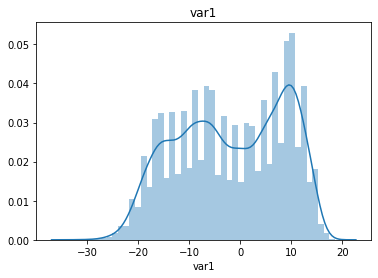

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

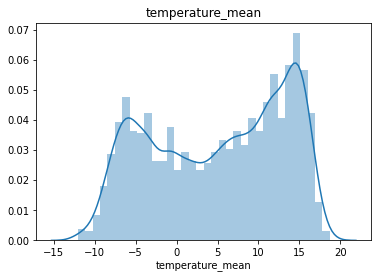

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

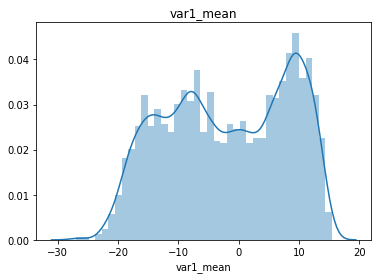

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

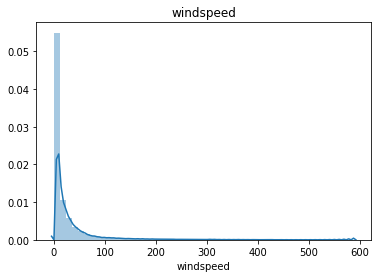

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

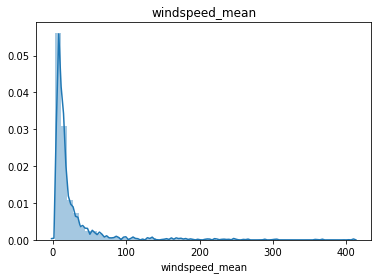

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

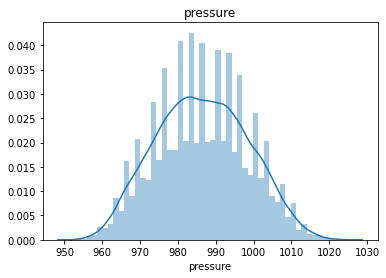

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

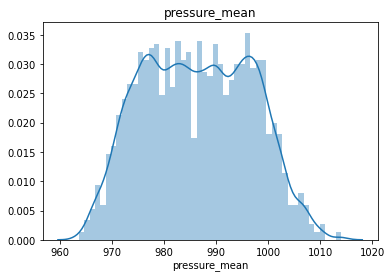

In [0]:

sns.distplot(df2['var1'])
plt.title('var1')
plt.show()


sns.distplot(df2['temperature_mean'])
plt.title('temperature_mean')
plt.show()


sns.distplot(df2['var1_mean'])
plt.title('var1_mean')
plt.show()


sns.distplot(df2['windspeed'])
plt.title('windspeed')
plt.show()

sns.distplot(df2['windspeed_mean'])
plt.title('windspeed_mean')
plt.show()

sns.distplot(df2['pressure'])
plt.title('pressure')
plt.show()

sns.distplot(df2['pressure_mean'])
plt.title('pressure_mean')
plt.show()

## PYCARET based approach

In [0]:
train1 = df2[df2['is_train']==1]
test1 = df2[df2['is_train']==0]

In [0]:
X_train,X_val,y_train,y_val = train_test_split(train1.drop('electricity_consumption',axis=1),train1['electricity_consumption'],test_size=0.2,random_state = 1994)

<IPython.core.display.Javascript object>

In [0]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26496 entries, 0 to 26495
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        26496 non-null  int64  
 1   temperature               26496 non-null  float64
 2   var1                      26496 non-null  float64
 3   pressure                  26496 non-null  float64
 4   windspeed                 26496 non-null  float64
 5   var2                      26496 non-null  object 
 6   electricity_consumption   26496 non-null  float64
 7   is_train                  26496 non-null  int64  
 8   datetimeYear              26496 non-null  int64  
 9   datetimeMonth             26496 non-null  float64
 10  datetimeWeek              26496 non-null  int64  
 11  datetimeDay               26496 non-null  float64
 12  datetimeDayofweek         26496 non-null  float64
 13  datetimeDayofyear         26496 non-null  float64
 14  dateti

In [0]:
# !pip install pycaret
from pycaret.regression import *

     |████████████████████████████████| 194kB 34.3MB/s 
     |████████████████████████████████| 133kB 43.4MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 1.2MB 53.8MB/s 
     |████████████████████████████████| 63.9MB 41kB/s 
     |████████████████████████████████| 389kB 52.4MB/s 
     |████████████████████████████████| 102kB 13.6MB/s 
     |████████████████████████████████| 1.6MB 46.6MB/s 
     |████████████████████████████████| 81kB 10.8MB/s 
     |████████████████████████████████| 1.2MB 51.3MB/s 
     |████████████████████████████████| 7.0MB 42.5MB/s 
     |████████████████████████████████| 266kB 54.3MB/s 
     |████████████████████████████████| 614kB 47.7MB/s 
     |████████████████████████████████| 235kB 59.7MB/s 
     |████████████████████████████████| 6.2MB 52.5MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 2.1MB 40.7MB/s 
     |████████████████████████████████| 552kB 44.9MB/s

In [0]:
exp_reg102 = setup(data = train1, target = 'electricity_consumption', train_size =0.8)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,735
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(26496, 58)"
4,Missing Values,True
5,Numeric Features,46
6,Categorical Features,10
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [0]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,23.677200,1351.872100,36.689800,0.882700,0.108600,0.079400
1,Random Forest,27.233200,1738.763500,41.621300,0.849000,0.122400,0.090700
2,Light Gradient Boosting Machine,34.886000,2521.348500,50.177600,0.781200,0.149000,0.116500
3,CatBoost Regressor,35.495800,2573.693300,50.684500,0.776600,0.150800,0.118800
4,K Neighbors Regressor,33.184200,2726.656400,52.162200,0.763400,0.152000,0.109900
5,Decision Tree,35.587200,3478.914600,58.866700,0.699100,0.171200,0.117900
6,Gradient Boosting Regressor,46.347000,4278.840900,65.387000,0.628500,0.192800,0.155200
7,Extreme Gradient Boosting,46.454100,4292.836100,65.492900,0.627300,0.193100,0.155600
8,Linear Regression,57.523900,6158.628800,78.459500,0.465400,0.242000,0.198200
9,Bayesian Ridge,57.556300,6162.838000,78.485800,0.465000,0.241800,0.198200


In [0]:
# knn_model = create_model('knn', fold = 5, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,23.93,1464.98,38.28,0.87,0.11,0.08
1,24.15,1542.90,39.28,0.87,0.12,0.08
2,24.61,1501.91,38.75,0.87,0.11,0.08
3,24.58,1544.99,39.31,0.88,0.11,0.08
4,24.01,1423.38,37.73,0.88,0.11,0.08
Mean,24.26,1495.63,38.67,0.87,0.11,0.08
SD,0.29,46.63,0.60,0.00,0.00,0.00


In [0]:
# tuned_knn2 = tune_model('knn', n_iter = 50)

In [0]:
# plot_model(tuned_knn2, plot = 'parameter')

,Parameters
algorithm,brute
leaf_size,60
metric,minkowski
metric_params,None
n_jobs,None
n_neighbors,2
p,2
weights,distance


In [0]:
lgbm = create_model('lightgbm', fold = 5, round = 2)
rf = create_model('rf', fold = 5, round = 2)
et = create_model('et', fold = 5, round = 2)
cat = create_model('catboost', fold = 5, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,36.32,2737.22,52.32,0.76,0.15,0.12
1,35.38,2403.63,49.03,0.79,0.15,0.12
2,35.85,2590.33,50.90,0.77,0.15,0.12
3,35.76,2882.20,53.69,0.76,0.15,0.12
4,35.70,2503.75,50.04,0.78,0.15,0.12
Mean,35.80,2623.43,51.19,0.77,0.15,0.12
SD,0.30,169.49,1.65,0.01,0.00,0.00


In [0]:
stack_1 = stack_models([rf,cat,lgbm], meta_model = et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,28.0239,1994.6322,44.6613,0.8322,0.1247,0.0882
1,26.2630,1838.5792,42.8787,0.8373,0.1257,0.0883
2,25.4758,1470.5021,38.3471,0.8627,0.1169,0.0851
3,26.7847,1677.0655,40.9520,0.8636,0.1204,0.0874
4,25.7242,1531.3646,39.1327,0.8708,0.1183,0.0863
5,27.1828,1735.1699,41.6554,0.8337,0.1233,0.0898
6,25.7913,1582.3805,39.7791,0.8755,0.1192,0.0858
7,26.8047,2155.4988,46.4273,0.8165,0.1243,0.0883
8,25.2935,1512.4229,38.8899,0.8625,0.1171,0.0852
9,25.5016,1594.7303,39.9341,0.8604,0.1169,0.0846


In [0]:
final_stack_1 = finalize_model(stack_1)

In [0]:
unseen_predictions = predict_model(stack_1, data=test1, round=0)


In [0]:
unseen_predictions.head()

,ID,temperature,var1,pressure,windspeed,var2,electricity_consumption,is_train,datetimeYear,datetimeMonth,datetimeWeek,datetimeDay,datetimeDayofweek,datetimeDayofyear,datetimeIs_month_end,datetimeIs_month_start,datetimeIs_quarter_end,datetimeIs_quarter_start,datetimeIs_year_end,datetimeIs_year_start,datetimeElapsed,datetimehour,var1_press_ratio,var1_temp_ratio,var1_windspeed_ratio,var1_var2,datetime_interval,temperature_mean,pressure_mean,var1_mean,windspeed_mean,var2_nunique,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,press_ratio,temp_ratio,wins_ratio,var1_ratio,Label
0,552,0.181193,0.320388,6.918695,5.573218,A,NaN,0,2013,0.656987,30,-0.905578,0.909297,-0.714898,0,0,0,0,0,0,0.015743,0.000000,0.479091,0.609756,0.336507,0.227259,0,0.101583,6.909379,0.227259,3.88709,1,204.625,0.056076,0.08834,0.08469,0.072491,0.064359,0.065769,0.048218,0.039851,0.036212,0.058692,0.072148,0.074517,0.078377,0.073696,0.078028,0.079033,0.074087,0.070188,0.079032,0.098175,0.096579,1.009360,1.116279,5.398539,0.944111,203.0
1,553,0.181193,0.236893,6.918695,5.587904,A,NaN,0,2013,0.656987,30,-0.905578,0.909297,-0.714898,0,0,0,0,0,0,0.015772,0.841471,0.483537,0.483092,0.341882,0.227259,0,0.101583,6.909379,0.227259,3.88709,1,204.625,0.056076,0.08834,0.08469,0.072491,0.064359,0.065769,0.048218,0.039851,0.036212,0.058692,0.072148,0.074517,0.078377,0.073696,0.078028,0.079033,0.074087,0.070188,0.079032,0.098175,0.096579,1.009360,1.116279,5.478406,1.191653,203.0
2,554,0.165138,0.306796,6.910751,5.596772,A,NaN,0,2013,0.656987,30,-0.905578,0.909297,-0.714898,0,0,0,0,0,0,0.015800,0.909297,0.480130,0.625731,0.337003,0.227259,0,0.101583,6.909379,0.227259,3.88709,1,204.625,0.056076,0.08834,0.08469,0.072491,0.064359,0.065769,0.048218,0.039851,0.036212,0.058692,0.072148,0.074517,0.078377,0.073696,0.078028,0.079033,0.074087,0.070188,0.079032,0.098175,0.096579,1.001373,1.194419,5.527207,0.984409,206.0
3,555,0.098624,0.236893,6.915723,5.609692,A,NaN,0,2013,0.656987,30,-0.905578,0.909297,-0.714898,0,0,0,0,0,0,0.015829,0.141120,0.483588,0.657005,0.341396,0.227259,0,0.101583,6.909379,0.227259,3.88709,1,204.625,0.056076,0.08834,0.08469,0.072491,0.064359,0.065769,0.048218,0.039851,0.036212,0.058692,0.072148,0.074517,0.078377,0.073696,0.078028,0.079033,0.074087,0.070188,0.079032,0.098175,0.096579,1.006365,1.518140,5.599077,1.191653,204.0
4,556,0.165138,0.306796,6.913737,0.568151,A,NaN,0,2013,0.656987,30,-0.905578,0.909297,-0.714898,0,0,0,0,0,0,0.015857,-0.756802,0.480069,0.625731,0.363752,0.227259,0,0.101583,6.909379,0.227259,3.88709,1,204.625,0.056076,0.08834,0.08469,0.072491,0.064359,0.065769,0.048218,0.039851,0.036212,0.058692,0.072148,0.074517,0.078377,0.073696,0.078028,0.079033,0.074087,0.070188,0.079032,0.098175,0.096579,1.004368,1.194419,0.036191,0.984409,232.0


In [0]:
unseen_predictions[['ID','Label']].rename(columns={'Label':'electricity_consumption'}).to_csv('pycaret.csv', index=False)

pycaret stacked model gave good results without any additional features
need to create additional features and see how it is performing

With additional features it performed even better with rmse of 72

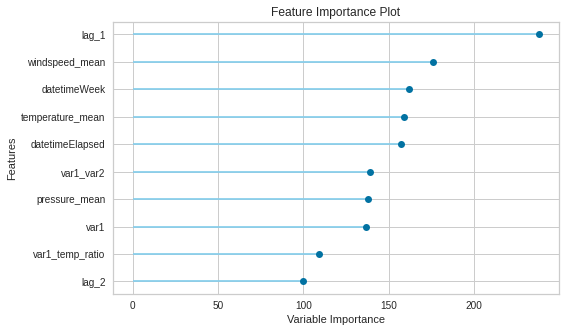

In [0]:
plot_model(lgbm, plot= 'feature')

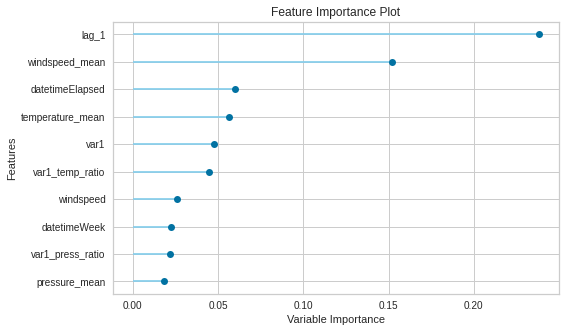

In [0]:
plot_model(rf, plot= 'feature')

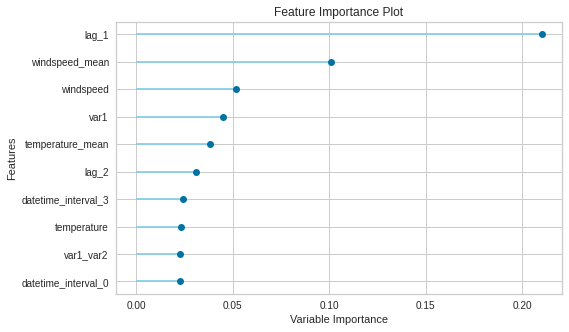

In [0]:
plot_model(et, plot= 'feature')

## Traditional approach

In [0]:
train1 = df2[df2['is_train']==1]
test1 = df2[df2['is_train']==0]

Imputing the missing values

In [0]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)

Removing the target to prevent leakage

In [0]:

train2 = train1.drop(['electricity_consumption','is_train'], axis=1)
test2 = test1.drop(['electricity_consumption','is_train'], axis=1)

In [0]:
back_col = test2.columns

In [0]:
train2 = pd.DataFrame(imp_mean.fit_transform(train2), columns = train2.columns)

<IPython.core.display.Javascript object>

In [0]:
test2 = pd.DataFrame(imp_mean.transform(test2), columns = back_col)

<IPython.core.display.Javascript object>

In [0]:
train2['electricity_consumption'] = train1['electricity_consumption']

In [0]:
print(train2.columns)
print(test2.columns)

Index(['ID', 'temperature', 'var1', 'pressure', 'windspeed', 'var2',
       'datetimeYear', 'datetimeMonth', 'datetimeWeek', 'datetimeDay',
       'datetimeDayofweek', 'datetimeDayofyear', 'datetimeIs_month_end',
       'datetimeIs_month_start', 'datetimeIs_quarter_end',
       'datetimeIs_quarter_start', 'datetimeIs_year_end',
       'datetimeIs_year_start', 'datetimeElapsed', 'datetimehour',
       'var1_press_ratio', 'var1_temp_ratio', 'var1_windspeed_ratio',
       'var1_var2', 'datetime_interval', 'temperature_mean', 'pressure_mean',
       'var1_mean', 'windspeed_mean', 'var2_nunique', 'lag_1', 'lag_2',
       'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10',
       'lag_11', 'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17',
       'lag_18', 'lag_19', 'lag_20', 'lag_21', 'lag_22', 'press_ratio',
       'temp_ratio', 'wins_ratio', 'var1_ratio', 'electricity_consumption'],
      dtype='object')
Index(['ID', 'temperature', 'var1', 'pressure', 'windsp

In [0]:
import lightgbm as lgb

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(train2.drop(['electricity_consumption'], axis=1), train2['electricity_consumption'], 
                                                    test_size=0.2, random_state=0)

<IPython.core.display.Javascript object>

# CROSS VALIDATING TO PICK THE MODEL

LGBM CROSS VALIDATION

In [0]:
lightgbm_params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse'
}


In [0]:
d_train = lgb.Dataset(X_train, label=y_train)

In [0]:
lg_cv = lgb.cv(lightgbm_params, d_train,nfold=5, categorical_feature=CAT_COL, verbose_eval=20, early_stopping_rounds=40, shuffle=False)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['datetimeYear', 'datetime_interval', 'var2', 'var2_nunique']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[20]	cv_agg's rmse: 66.7412 + 1.09592
[40]	cv_agg's rmse: 57.4848 + 1.51117
[60]	cv_agg's rmse: 53.6374 + 1.52032
[80]	cv_agg's rmse: 51.456 + 1.52474
[100]	cv_agg's rmse: 49.9887 + 1.45791


In [0]:
print('Best CV score:', lg_cv['rmse-mean'][-1])

Best CV score: 50.02189923040987


CATBOOST REGRESSOR CV

In [0]:
CAT_IND = X_train.columns.get_indexer(CAT_COL)

In [0]:
X_train[CAT_COL] = X_train[CAT_COL].astype('int')

In [0]:
!pip install catboost
from catbaoost import Pool, cv

     |████████████████████████████████| 64.8MB 45kB/s 


In [0]:
params = {"iterations": 400,
          "loss_function": "RMSE",
          "verbose": False}


In [0]:
cv_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=CAT_IND)

In [0]:
scores = cv(cv_dataset,
            params,
            fold_count=5, shuffle=False)

In [0]:
scores['test-RMSE-mean'].min()

61.16127099726566

onehot encoding the categorical columns to fit the tree regressors

In [0]:

X_train = pd.get_dummies(data=X_train, columns=CAT_COL)
X_valid = pd.get_dummies(data=X_valid, columns=CAT_COL)

test2 = pd.get_dummies(data=test2, columns=CAT_COL)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RANDOMFOREST REGRESSOR CV

In [0]:

rf_model = RandomForestRegressor()
rmse_results = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)


In [0]:
-1*np.mean(rmse_results)

<IPython.core.display.Javascript object>

40.6657281703703

EXTRATREE REGRESSOR CV

In [0]:
et_model = ExtraTreesRegressor()
rmse_results = cross_val_score(et_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)


In [0]:
-1*np.mean(rmse_results)

<IPython.core.display.Javascript object>

35.929679404721284

XG REGRESSOR CV

In [0]:
xgtrain = xgb.DMatrix(X_train, y_train )

<IPython.core.display.Javascript object>

In [0]:
xg_reg = xgb.XGBRegressor(silent=True)
xgb_param = xg_reg.get_xgb_params()

<IPython.core.display.Javascript object>

In [0]:
xg_cv = xgb.cv(xgb_param, xgtrain, nfold=5, metrics='rmse', seed=0)

<IPython.core.display.Javascript object>

In [0]:
xg_cv['test-rmse-mean']

0    288.053180
1    262.009558
2    238.876175
3    218.201511
4    199.985114
5    183.773901
6    169.401108
7    156.676123
8    145.480402
9    135.723917
Name: test-rmse-mean, dtype: float64

ADABOOST REGRESSOR CV

In [0]:
adb_model = AdaBoostRegressor()
rmse_results = cross_val_score(adb_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)


In [0]:
-1*np.mean(rmse_results)

<IPython.core.display.Javascript object>

108.85549085154665

From the cross validation results, best performing models are lgbm, rf and et


# Tuning the hyperparameters of the model

# New Section

EXTRA TREE REGRESSOR

In [0]:
from sklearn.model_selection import StratifiedKFold

n_fold = 10
folds = StratifiedKFold(n_splits=n_fold, shuffle=False)


In [0]:
cv_train= train2[X_train.columns]
cv_train.drop(['ID'], axis=1, inplace=True)

In [0]:
cv_label = train2['electricity_consumption']

In [0]:
!pip install bayesian-optimization
def et_evaluate(**params):
    
    params['n_estimators'] = int(round(params['n_estimators'],0))
    params['min_samples_split'] = int(round(params['min_samples_split'],0))
    params['min_samples_leaf'] = int(round(params['min_samples_leaf'],0))
    params['bootstrap'] = int(round(params['bootstrap'],0))
        
    et_cv_score = cross_val_score(ExtraTreesRegressor(), cv_train, cv_label, cv=folds, scoring='neg_root_mean_squared_error')

    
    return np.mean(et_cv_score)

from bayes_opt import BayesianOptimization

et_param_grid = {
                 'max_depth' : (4,100),
                 'n_estimators': (50,2000),
                 'min_samples_split': (2,10),
                 'min_samples_leaf': (2, 10),
                 'bootstrap': (True, False),
                 }

et_bay_opt = BayesianOptimization(et_evaluate, et_param_grid)
et_bay_opt.maximize(init_points=5, n_iter=20)

et_bay_opt.max['params']

In [0]:
et_tuned = ExtraTreesRegressor(bootstrap = False,
max_depth = 93,
min_samples_leaf = 4,
min_samples_split= 3,
n_estimators = 1494, max_features='sqrt', criterion='mae')

In [0]:
X_train.columns

Index(['ID', 'temperature', 'var1', 'pressure', 'windspeed', 'datetimeMonth',
       'datetimeWeek', 'datetimeDay', 'datetimeDayofweek', 'datetimeDayofyear',
       'datetimeIs_month_end', 'datetimeIs_month_start',
       'datetimeIs_quarter_end', 'datetimeIs_quarter_start',
       'datetimeIs_year_end', 'datetimeIs_year_start', 'datetimeElapsed',
       'datetimehour', 'var1_press_ratio', 'var1_temp_ratio',
       'var1_windspeed_ratio', 'var1_var2', 'temperature_mean',
       'pressure_mean', 'var1_mean', 'windspeed_mean', 'lag_1', 'lag_2',
       'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10',
       'lag_11', 'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17',
       'lag_18', 'lag_19', 'lag_20', 'lag_21', 'lag_22', 'press_ratio',
       'temp_ratio', 'wins_ratio', 'var1_ratio', 'var2_0.0', 'var2_1.0',
       'var2_2.0', 'datetimeYear_2013.0', 'datetimeYear_2014.0',
       'datetimeYear_2015.0', 'datetimeYear_2016.0', 'datetimeYear_2017.0',
       '

In [0]:
# et_tuned.fit(X_train.drop(['ID'], axis=1), np.log(y_train))

In [0]:
et_val_pred = np.exp(et_tuned.predict(x_test.drop(['ID','is_train'], axis=1)))

RF tuned 

In [0]:
X_train.drop(['ID','datetimeIs_year_end','datetimeIs_quarter_end','datetimeIs_month_end',\
              'datetimeIs_year_start', 'var2_nunique_3.0', 'datetimeIs_year_start',\
              'datetimeIs_month_start','var2_nunique_1.0','var2_nunique_2.0',\
              'lag_11', 'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17',
       'lag_18', 'lag_19', 'lag_20', 'lag_21', 'lag_22'], axis=1, inplace=True)

X_valid.drop(['ID','datetimeIs_year_end','datetimeIs_quarter_end','datetimeIs_month_end',\
              'datetimeIs_year_start', 'var2_nunique_3.0', 'datetimeIs_year_start',\
              'datetimeIs_month_start','var2_nunique_1.0','var2_nunique_2.0',\
              'lag_11', 'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17',
       'lag_18', 'lag_19', 'lag_20', 'lag_21', 'lag_22'], axis=1, inplace=True)

test2.drop(['datetimeIs_year_end','datetimeIs_quarter_end','datetimeIs_month_end',\
              'datetimeIs_year_start', 'var2_nunique_3.0', 'datetimeIs_year_start',\
              'datetimeIs_month_start','var2_nunique_1.0','var2_nunique_2.0',\
              'lag_11', 'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17',
       'lag_18', 'lag_19', 'lag_20', 'lag_21', 'lag_22'], axis=1, inplace=True)

In [0]:
rf_tuned = RandomForestRegressor(max_depth=80, min_samples_leaf=4,\
                           min_samples_split=5, n_estimators=1400,\
                           random_state=0, n_jobs=-1)
# rf_tuned.fit(X_train.drop(['ID'], axis=1), \
#   

rf_tuned.fit(X_train, np.log(y_train))


<IPython.core.display.Javascript object>

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1400, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
fi = pd.DataFrame({'feature':list(X_train.columns),\
              'importance':rf_tuned.feature_importances_}).sort_values(by='importance', ascending=False)

<IPython.core.display.Javascript object>

In [0]:
pd.set_option('display.max_rows',100)
IMP = fi['feature'].head(30).tolist()

<IPython.core.display.Javascript object>

In [0]:
plt.figure(figsize=(15,10))
sns.barplot(y='feature', x='importance')
plt.show()

In [0]:
rf_predv = np.exp(rf_tuned.predict(X_valid))

<IPython.core.display.Javascript object>

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_valid, rf_predv))
print(rms)

39.532321289589916


In [0]:
# !pip install catboost
from sklearn.ensemble import ExtraTreesRegressor, StackingRegressor
from catboost import CatBoostRegressor

estimators = [
     ('ext', ExtraTreesRegressor(random_state=42, bootstrap=True)),
     ('rf', RandomForestRegressor(random_state=42))
    #  ('cat', CatBoostRegressor(random_state=42))
    ]
    
stack_model = StackingRegressor(
     estimators=estimators,
     final_estimator= lgb.LGBMRegressor()
 )

stack_model.fit(X_train, np.log(y_train))


In [0]:
test2['stack_pred'] = np.exp(stack_model.predict(test2[X_train.columns])).astype('int')

<IPython.core.display.Javascript object>

stacked model with lgb as second layer produced better results

In [0]:
test2[['ID','stack_pred']].to_csv('stack.csv', index=False)

## Tuning the LGBM

# New Section

In [0]:
# !pip install bayesian-optimization
# Objective Function
train_data = lgb.Dataset(data=X_train.drop(['ID'], axis=1), label=np.log(y_train), free_raw_data=False)

def lgb_eval(learning_rate,num_leaves, feature_fraction,\
             bagging_fraction, max_depth, \
             lambda_l1, lambda_l2,\
             min_split_gain, min_child_weight,subsample):
        
        params = {'num_iterations': 1500,
                  'boosting_type': 'gbdt',
                  'objective': 'regression',
                  'early_stopping_round':150,
                  'metric':'rmse'} 

        params['learning_rate'] = max(min(learning_rate, 1), 0)    
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['lambda_l1'] = max(lambda_l1, 0)
        params['lambda_l2'] = max(lambda_l2, 0)
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight,
        params['subsample'] = max(min(subsample, 1), 0)
        
        cv_result = lgb.cv(params, train_data, nfold=5, seed=0, verbose_eval =200,stratified=False)
        
        return (-1.0 * np.array(cv_result['rmse-mean'])).max()
  
pbs = {'learning_rate': (0.01, 1.0),
    'num_leaves': (200, 400),
        'feature_fraction': (0.1, 0.9),
        'bagging_fraction': (0.8, 1),
        'max_depth': (11, 29),
        'lambda_l1': (0, 2),
        'lambda_l2': (0, 3),
        'min_split_gain': (0.001, 0.1),
        'min_child_weight': (1, 10),
       'subsample': (0.01, 1.0)
      }


from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(lgb_eval, pbs, random_state=0)

optimizer.maximize(init_points=5, n_iter=20)

optimizer.max['params']

<IPython.core.display.Javascript object>

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | min_sp... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



<IPython.core.display.Javascript object>

|  1        | -0.148    |  0.9098   |  0.6722   |  1.206    |  1.635    |  0.4294   |  22.63    |  4.938    |  0.08929  |  392.7    |  0.3896   |
[200]	cv_agg's rmse: 0.143068 + 0.00372627


<IPython.core.display.Javascript object>

|  2        | -0.1431   |  0.9583   |  0.5231   |  1.136    |  2.777    |  0.08033  |  12.57    |  1.182    |  0.08343  |  355.6    |  0.8713   |


<IPython.core.display.Javascript object>

|  3        | -0.1419   |  0.9957   |  0.7393   |  0.923    |  2.342    |  0.1271   |  22.52    |  2.29     |  0.09452  |  304.4    |  0.4205   |
[200]	cv_agg's rmse: 0.136548 + 0.0033288


<IPython.core.display.Javascript object>

|  4        | -0.1365   |  0.8529   |  0.7194   |  0.9123   |  1.705    |  0.0286   |  22.12    |  6.509    |  0.06208  |  388.7    |  0.685    |


<IPython.core.display.Javascript object>

|  5        | -0.1458   |  0.8719   |  0.4496   |  1.395    |  0.1807   |  0.6701   |  23.07    |  2.893    |  0.01376  |  263.1    |  0.3701   |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



[200]	cv_agg's rmse: 0.159714 + 0.00328173


<IPython.core.display.Javascript object>

|  6        | -0.1597   |  0.9906   |  0.1167   |  1.935    |  2.719    |  0.6788   |  12.7     |  9.685    |  0.05684  |  200.2    |  0.8296   |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



<IPython.core.display.Javascript object>

|  7        | -0.1529   |  0.9347   |  0.7014   |  1.498    |  0.2903   |  0.5941   |  11.08    |  9.984    |  0.08265  |  295.8    |  0.3176   |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



<IPython.core.display.Javascript object>

|  8        | -0.1569   |  0.8003   |  0.5119   |  1.977    |  0.7105   |  0.8368   |  28.91    |  9.276    |  0.04664  |  204.8    |  0.5737   |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



<IPython.core.display.Javascript object>

|  9        | -0.1465   |  0.9237   |  0.6301   |  1.555    |  1.103    |  0.5167   |  28.72    |  9.945    |  0.0439   |  349.7    |  0.5764   |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



<IPython.core.display.Javascript object>

|  10       | -0.1449   |  0.9021   |  0.7297   |  1.604    |  2.999    |  0.2294   |  11.46    |  9.231    |  0.06286  |  397.2    |  0.6316   |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



<IPython.core.display.Javascript object>

|  11       | -0.138    |  0.8158   |  0.2937   |  0.05211  |  0.003602 |  0.3099   |  16.94    |  1.796    |  0.02148  |  201.6    |  0.7418   |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



[200]	cv_agg's rmse: 0.136285 + 0.00373555


<IPython.core.display.Javascript object>

|  12       | -0.1363   |  0.9341   |  0.6575   |  0.5018   |  2.989    |  0.05405  |  25.75    |  1.032    |  0.07268  |  233.0    |  0.9252   |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



<IPython.core.display.Javascript object>

|  13       | -0.1363   |  0.8604   |  0.623    |  0.06065  |  0.5227   |  0.2032   |  15.42    |  9.1      |  0.07703  |  383.0    |  0.8398   |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



[200]	cv_agg's rmse: 0.151245 + 0.00292256


<IPython.core.display.Javascript object>

|  14       | -0.1512   |  0.935    |  0.1706   |  1.087    |  1.452    |  0.2368   |  18.07    |  6.971    |  0.09943  |  385.0    |  0.6779   |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



<IPython.core.display.Javascript object>

|  15       | -0.1594   |  0.9666   |  0.7425   |  0.2005   |  0.6908   |  0.8949   |  28.6     |  9.918    |  0.08728  |  399.3    |  0.4341   |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



<IPython.core.display.Javascript object>

|  16       | -0.1398   |  0.8775   |  0.8719   |  0.6784   |  2.317    |  0.5832   |  28.64    |  9.69     |  0.02647  |  276.1    |  0.821    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



<IPython.core.display.Javascript object>

|  17       | -0.1604   |  0.8837   |  0.8929   |  0.005042 |  0.219    |  0.8827   |  11.22    |  8.863    |  0.08938  |  249.5    |  0.07742  |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



<IPython.core.display.Javascript object>

|  18       | -0.1415   |  0.9805   |  0.6548   |  0.5974   |  2.408    |  0.3893   |  27.52    |  1.365    |  0.05986  |  200.1    |  0.871    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



<IPython.core.display.Javascript object>

|  19       | -0.1574   |  0.9666   |  0.8804   |  1.576    |  1.408    |  0.9634   |  28.6     |  1.487    |  0.043    |  234.9    |  0.3023   |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



[200]	cv_agg's rmse: 0.128542 + 0.00299626


<IPython.core.display.Javascript object>

|  20       | -0.1285   |  0.9971   |  0.8315   |  0.03223  |  0.4114   |  0.05351  |  28.59    |  1.158    |  0.05015  |  326.3    |  0.9886   |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



[200]	cv_agg's rmse: 0.125655 + 0.00280518


<IPython.core.display.Javascript object>

|  21       | -0.1257   |  0.8325   |  0.8087   |  0.07535  |  1.956    |  0.1119   |  28.47    |  2.519    |  0.02636  |  355.9    |  0.7695   |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



<IPython.core.display.Javascript object>

|  22       | -0.1299   |  0.9207   |  0.8306   |  0.2409   |  1.497    |  0.1483   |  11.57    |  1.313    |  0.03193  |  290.3    |  0.884    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



[200]	cv_agg's rmse: 0.135627 + 0.00350879
[400]	cv_agg's rmse: 0.132169 + 0.00327891


<IPython.core.display.Javascript object>

|  23       | -0.1322   |  0.9488   |  0.5608   |  0.01462  |  2.543    |  0.0176   |  11.17    |  4.103    |  0.0604   |  399.7    |  0.8823   |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



[200]	cv_agg's rmse: 0.13156 + 0.00331359


<IPython.core.display.Javascript object>

|  24       | -0.1316   |  0.8462   |  0.7966   |  0.1432   |  2.689    |  0.07011  |  15.59    |  9.618    |  0.05928  |  332.1    |  0.5977   |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument



<IPython.core.display.Javascript object>

|  25       | -0.1294   |  0.9038   |  0.7634   |  0.03004  |  1.592    |  0.1473   |  28.39    |  1.637    |  0.04515  |  280.0    |  0.868    |


{'bagging_fraction': 0.8324981815338539,
 'feature_fraction': 0.8087256609867652,
 'lambda_l1': 0.07535403090023829,
 'lambda_l2': 1.955869564432542,
 'learning_rate': 0.1119187397771882,
 'max_depth': 28.470792907269736,
 'min_child_weight': 2.5189319073053933,
 'min_split_gain': 0.02635530076917121,
 'num_leaves': 355.851207735464,
 'subsample': 0.7694860068767168}

Tuned_lgbm

In [0]:
lightgbm_params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'bagging_fraction': 0.8,
    'feature_fraction': 0.8,
    'lambda_l1': 0.08,
    'lambda_l2': 1.9,
    'metric': 'rmse',
    'max_depth': 28, 
    'learning_rate': 0.1,
    'n_estimators':3000,
    'min_child_weight': 2.5,
    'min_split_gain': 0.03,
    'num_leaves': 356,
    'subsample': 0.7
}


# d_train = lgb.Dataset(X_train.drop(['ID'], axis=1), label=np.log(y_train))
# d_valid = lgb.Dataset(X_valid.drop(['ID'], axis=1), label=np.log(y_valid))
# watchlist = [d_valid]

d_train = lgb.Dataset(X_train[IMP], label=np.log(y_train))
d_valid = lgb.Dataset(X_valid[IMP], label=np.log(y_valid))
watchlist = [d_valid]

lightgbm_model = lgb.train(lightgbm_params, d_train, valid_sets = watchlist, verbose_eval=50, 
                          early_stopping_rounds =70)

preds = np.exp(lightgbm_model.predict(test2[IMP], num_iteration=lightgbm_model.best_iteration))


test2['lgbm_power'] = preds

test2[['ID','lgbm_power']].rename(columns={'lgbm_power':'electricity_consumption'}).to_csv('lgbm.csv', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument



Training until validation scores don't improve for 70 rounds.
[50]	valid_0's rmse: 0.125341
[100]	valid_0's rmse: 0.125287
Early stopping, best iteration is:
[53]	valid_0's rmse: 0.125287


<IPython.core.display.Javascript object>

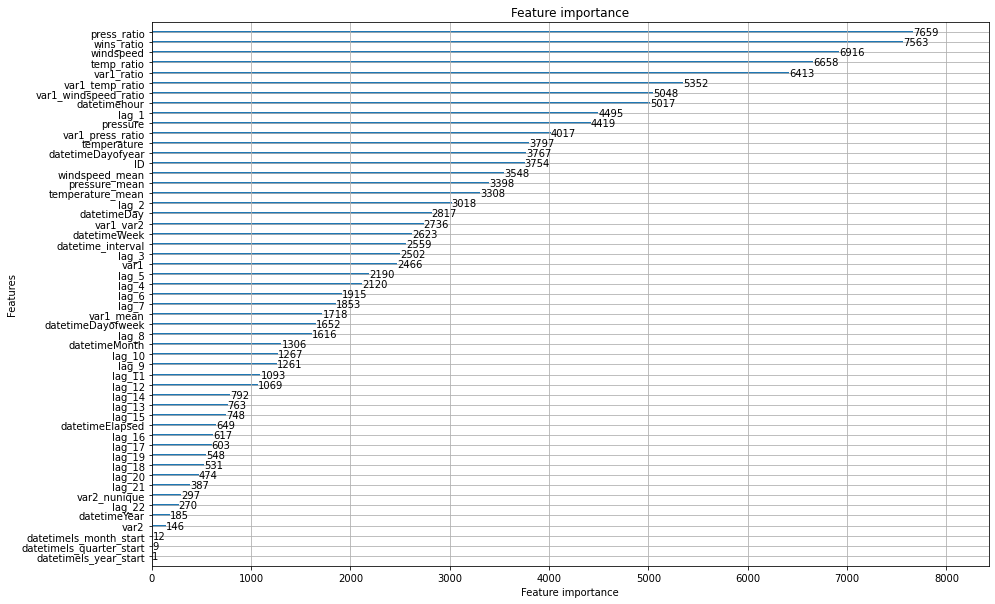

In [0]:
 lgb.plot_importance(lightgbm_model, figsize=(15,10))